# Simple Moving Average Trading Strategy
This file contains backtesting results for a trading strategy which creates buy and sell indicators based on 30 day and 100 day simple moving averages. Backtesting results vary for the assets based on the volitility and momentum of each.
Historical data is provided by the yfinance python package and does not require api keys.

In [286]:
#Imports
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Proof Of Concept

In [302]:
#Get data
historical = yf.download("AAPL", start='2012-12-01', end='2021-01-09')
historical = historical.round(2)
historical

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-03,21.20,21.24,20.91,20.94,18.22,364280000
2012-12-04,20.78,20.78,20.43,20.57,17.90,557068400
2012-12-05,20.32,20.33,19.24,19.24,16.75,1044638000
2012-12-06,18.89,19.76,18.52,19.54,17.01,1177212400
2012-12-07,19.76,19.83,18.93,19.04,16.57,787040800
...,...,...,...,...,...,...
2021-01-04,133.52,133.61,126.76,129.41,129.41,143301900
2021-01-05,128.89,131.74,128.43,131.01,131.01,97664900
2021-01-06,127.72,131.05,126.38,126.60,126.60,155088000


In [288]:
#Create a simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = historical['Adj Close'].rolling(window = 30).mean()

In [289]:
#Create a simple moving average with a 100 day average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = historical['Adj Close'].rolling(window=100).mean()

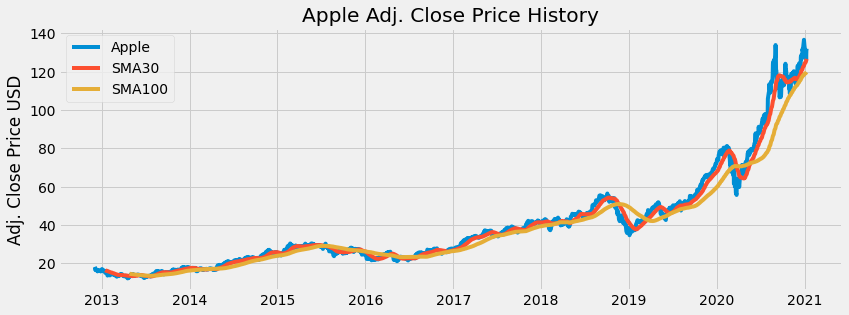

In [290]:
#Plot historical data + SMA lines
plt.figure(figsize=(12.5, 4.5))
plt.plot(historical['Adj Close'], label='Apple')
plt.plot(SMA30['Adj Close'], label='SMA30')
plt.plot(SMA100['Adj Close'], label='SMA100')
plt.title('Apple Adj. Close Price History')
plt.ylabel('Adj. Close Price USD')
plt.legend(loc='upper left')
plt.show()

## Backtesting with multiple tickers

In [291]:
#Function to create buy/sell signals whenever one moving average crosses the other
def create_buy_sell(strategy_data, symbol):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(len(strategy_data)):
        if strategy_data['SMA30'][i] > strategy_data['SMA100'][i] and flag != 1:
            sigPriceBuy.append(strategy_data[symbol][i])
            sigPriceSell.append(np.nan)
            flag = 1
        elif strategy_data['SMA30'][i] < strategy_data['SMA100'][i] and flag != 0:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(strategy_data[symbol][i])
            flag = 0
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return(sigPriceBuy, sigPriceSell)

In [296]:
#Function to simulate trades based on the buy/sell signals and calculate overall profit
def calculate_profit(strategy_data, symbol):
    portfolio = 200;
    holding = False
    for i in range(len(strategy_data)):
        if strategy_data['Buy_Price'][i] >= 0 or strategy_data['Sell_Price'][i] >= 0:
            if holding == False and strategy_data['Buy_Price'][i] >= 0:
                portfolio -= strategy_data['Buy_Price'][i]
                holding = True
            elif holding == True and strategy_data['Sell_Price'][i] >= 0:
                portfolio += strategy_data['Sell_Price'][i]
    if holding == True:
        portfolio += strategy_data[symbol][-1]
    percent_return = (portfolio / 200 * 100).round(2)
    percent_return = str(percent_return) + '% portfolio increase'
    asset_change = (strategy_data[symbol][-1] / strategy_data[symbol][0] * 100).round(2)
    asset_change = str(asset_change) + '% asset increase'
    return(percent_return, asset_change)

In [297]:
#Main backtesting function
def moving_average_backtest(symbol):
    #Get Asset Price Data
    price_data = yf.download(symbol, start='2012-12-01', end='2021-01-09')
    price_data = price_data.round(2)

    #Create 30 day and 100 day simple moving averages
    SMA30 = pd.DataFrame()
    SMA30['Adj Close'] = price_data['Adj Close'].rolling(window=30).mean()
    SMA100 = pd.DataFrame()
    SMA100['Adj Close'] = price_data['Adj Close'].rolling(window=100).mean()
    
    #New DataFrame
    strategy_data = pd.DataFrame()
    strategy_data[symbol] = price_data['Adj Close']
    strategy_data['SMA30'] = SMA30['Adj Close']
    strategy_data['SMA100'] = SMA100['Adj Close']
    
    #Run backtest to create buy and sell indicators
    indicators = create_buy_sell(strategy_data, symbol)
    strategy_data['Buy_Price'] = indicators[0]
    strategy_data['Sell_Price'] = indicators[1]

    #Calculate profit + return asset graph
    plt.figure(figsize=(12.5, 4.5))
    plt.plot(price_data['Adj Close'], label=symbol, alpha=0.5)
    plt.plot(SMA30['Adj Close'], label='SMA30', alpha=0.5)
    plt.plot(SMA100['Adj Close'], label='SMA100', alpha=0.5)
    plt.scatter(strategy_data.index, strategy_data['Buy_Price'], label='Buy', marker="^", color='green')
    plt.scatter(strategy_data.index, strategy_data['Sell_Price'], label='Sell', marker="v", color='red')
    plt.title(str(symbol) + ' Moving Average Strategy Backtest Results')
    plt.ylabel('Adj. Close Price USD')
    plt.legend(loc='upper left')
    plt.show()
    
    print(calculate_profit(strategy_data, symbol))

[*********************100%***********************]  1 of 1 completed


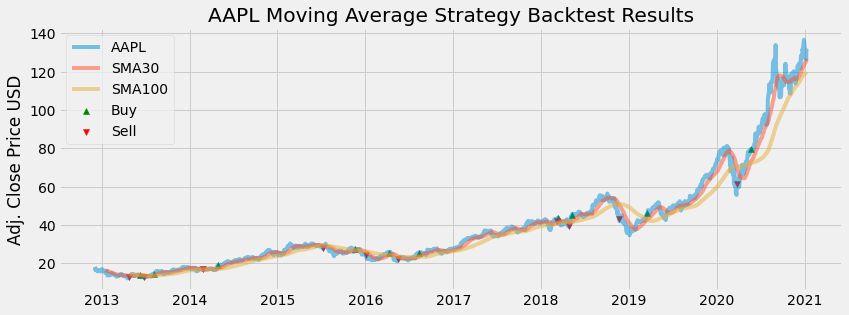

('304.48% portfolio increase', '724.75% asset increase')
[*********************100%***********************]  1 of 1 completed


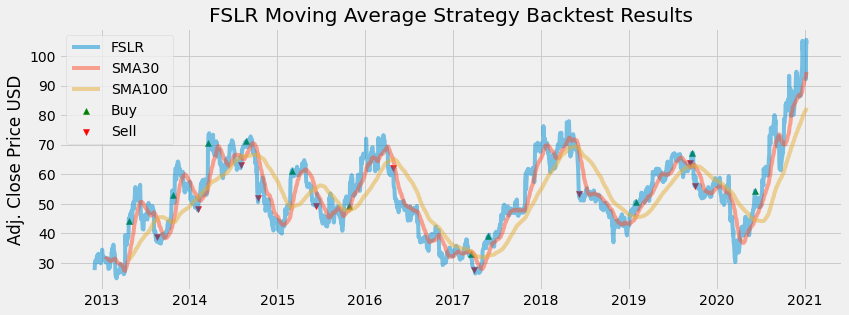

('386.74% portfolio increase', '378.55% asset increase')
[*********************100%***********************]  1 of 1 completed


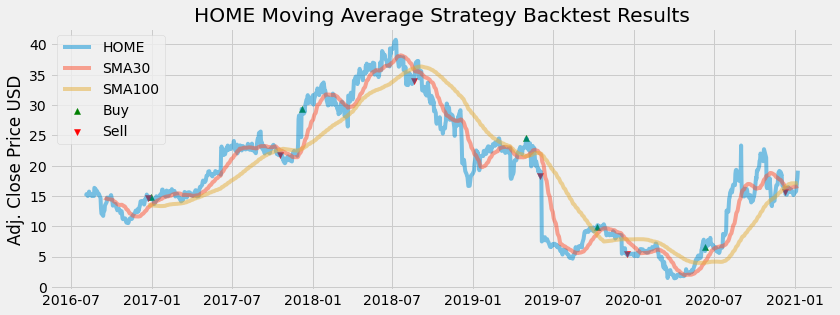

('149.79% portfolio increase', '127.87% asset increase')
[*********************100%***********************]  1 of 1 completed


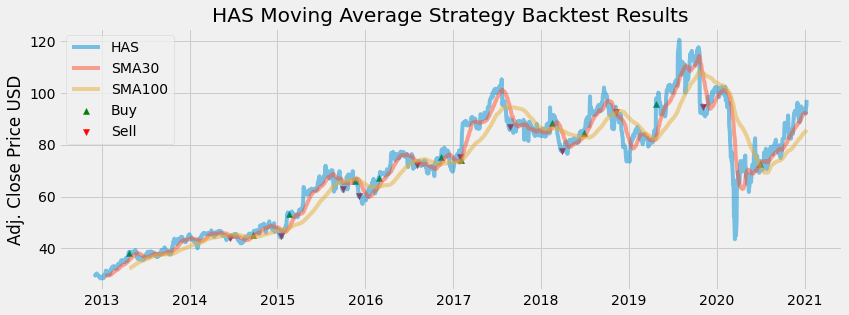

('484.9% portfolio increase', '323.23% asset increase')
[*********************100%***********************]  1 of 1 completed


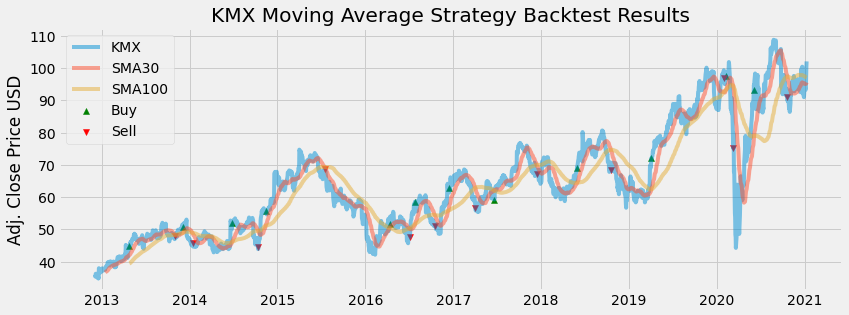

('509.33% portfolio increase', '283.69% asset increase')


In [299]:
tickers = ['AAPL', 'FSLR', 'HOME', 'HAS', 'KMX']
for i in range(len(tickers)):
    moving_average_backtest(tickers[i])

#### Final Thoughts
The results of this simplistic strategy arent all that fantastic. In general for assets with higher levels of volitility / momentum, this strategy can outperform the asset which it is run on.
#### Future Improvements
Since this is a backtest for a simple strategy, the list of future improvements are almost to long to list. A few would be introducing stop-losses, adding additional indicators to create a more flushed out trading strategy and finally further tweaking of parameters such as timeframe.